In [120]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [121]:
df = pd.read_csv('bmw1.csv', sep=',')
df

,model,year,price,type,distance,fuel,tax,miles per galoon,size
0,4,2014,11200.000000,0,67068.0,0,125.000000,57.6,2.0
1,11,2017,18500.000000,2,12160.0,0,145.000000,65.7,2.0
2,2,2017,18300.000000,2,20000.0,0,150.000000,62.8,2.0
3,0,2019,29398.000000,2,9983.0,3,145.000000,39.8,3.0
4,2,2018,22998.000000,2,16360.0,0,145.000000,57.7,2.0
...,...,...,...,...,...,...,...,...,...
842,0,2017,13500.000000,1,16423.0,0,150.000000,72.4,1.5
843,0,2016,8800.000000,1,51002.0,0,0.000000,83.1,1.5
844,0,2015,16314.000000,1,17846.0,3,295.328415,35.3,3.0
845,4,2014,15495.000000,2,51565.0,0,160.000000,51.4,2.0


In [122]:
df.describe()

,model,year,price,type,distance,fuel,tax,miles per galoon,size
count,847.000000,847.000000,847.000000,847.000000,847.000000,847.000000,847.000000,847.000000,847.000000
mean,4.318772,2017.055490,21202.038959,1.436836,24695.637662,0.793388,129.029464,55.626494,2.170956
std,4.800996,1.707442,9043.637895,0.756665,19827.618230,1.307752,55.244498,12.438446,0.509050
min,0.000000,2013.000000,6998.000000,0.000000,10.000000,0.000000,0.000000,31.400000,1.500000
25%,1.000000,2016.000000,14991.000000,1.000000,9007.000000,0.000000,125.000000,48.700000,2.000000
50%,2.000000,2017.000000,19000.000000,2.000000,20001.000000,0.000000,145.000000,54.300000,2.000000
75%,5.500000,2019.000000,24944.000000,2.000000,35618.000000,3.000000,150.000000,62.800000,2.000000
max,19.000000,2020.000000,50647.055451,2.000000,84633.016616,3.000000,295.328415,104.084750,3.000000


In [123]:
df['age']=(2021-df['year'])
df['priceLevel']=np.where (df['price']<=21202,0,1)
df

,model,year,price,type,distance,fuel,tax,miles per galoon,size,age,priceLevel
0,4,2014,11200.000000,0,67068.0,0,125.000000,57.6,2.0,7,0
1,11,2017,18500.000000,2,12160.0,0,145.000000,65.7,2.0,4,0
2,2,2017,18300.000000,2,20000.0,0,150.000000,62.8,2.0,4,0
3,0,2019,29398.000000,2,9983.0,3,145.000000,39.8,3.0,2,1
4,2,2018,22998.000000,2,16360.0,0,145.000000,57.7,2.0,3,1
...,...,...,...,...,...,...,...,...,...,...,...
842,0,2017,13500.000000,1,16423.0,0,150.000000,72.4,1.5,4,0
843,0,2016,8800.000000,1,51002.0,0,0.000000,83.1,1.5,5,0
844,0,2015,16314.000000,1,17846.0,3,295.328415,35.3,3.0,6,0
845,4,2014,15495.000000,2,51565.0,0,160.000000,51.4,2.0,7,0


In [124]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler().fit(df)
df = sc.transform(df)
df = pd.DataFrame(df, columns = ['model','year','price','type','distance','fuel','tax','miles per galoon', 'size', 'age', 'priceLevel']).round()

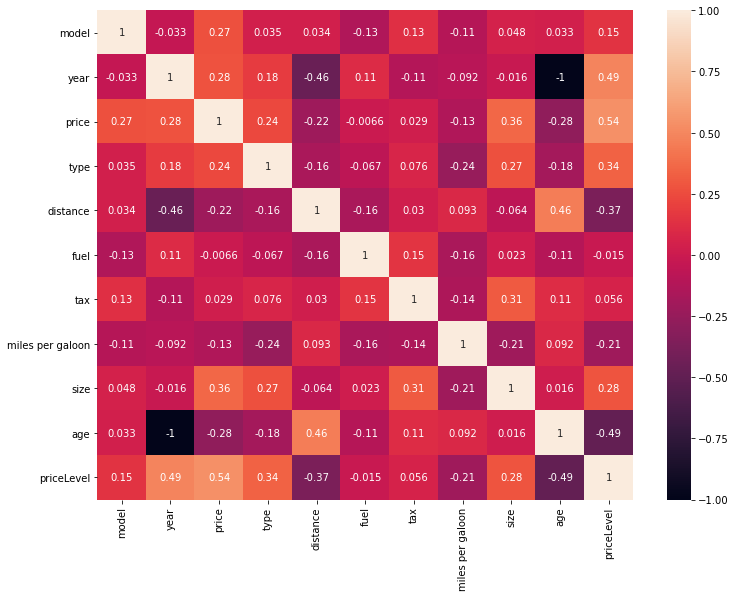

In [125]:
# Cheking correlations
import seaborn as sns
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, annot=True)
plt.show()

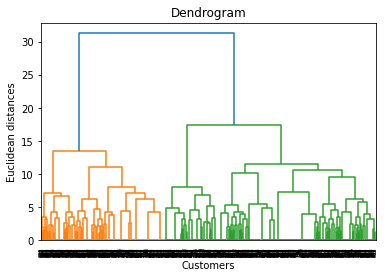

In [126]:
# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(df, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [127]:
# Fitting Hierarchical Clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward').fit_predict(df)

In [128]:
hc

array([0, 1, 4, 2, 1, 0, 2, 1, 2, 2, 3, 4, 0, 1, 2, 0, 1, 0, 1, 2, 1, 0,
       1, 3, 2, 1, 2, 0, 2, 3, 4, 0, 2, 2, 1, 4, 3, 0, 0, 1, 1, 1, 4, 3,
       3, 4, 4, 3, 2, 1, 4, 1, 2, 0, 0, 3, 0, 1, 1, 0, 4, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 2, 3, 1, 1, 0, 2, 3, 1, 0, 2, 0, 0, 1, 1, 1, 0, 1, 4,
       0, 1, 2, 0, 2, 4, 0, 3, 1, 1, 1, 4, 2, 1, 3, 1, 1, 3, 2, 0, 1, 0,
       0, 4, 2, 2, 2, 1, 0, 1, 3, 0, 3, 2, 0, 1, 4, 4, 0, 4, 4, 3, 3, 1,
       2, 3, 2, 0, 0, 1, 4, 1, 2, 1, 0, 1, 0, 2, 0, 0, 0, 1, 4, 4, 2, 1,
       1, 1, 1, 3, 0, 4, 4, 4, 1, 1, 3, 1, 1, 0, 2, 1, 2, 3, 3, 0, 4, 0,
       1, 4, 2, 4, 1, 4, 4, 0, 2, 1, 0, 1, 4, 3, 1, 3, 1, 1, 2, 0, 4, 2,
       1, 4, 2, 0, 2, 1, 1, 1, 1, 4, 0, 2, 2, 1, 0, 1, 1, 0, 3, 2, 0, 2,
       4, 0, 3, 4, 1, 0, 0, 2, 2, 2, 0, 2, 4, 3, 3, 4, 0, 1, 4, 2, 4, 1,
       0, 1, 2, 4, 1, 2, 4, 0, 1, 0, 0, 0, 4, 2, 4, 1, 0, 1, 1, 3, 1, 3,
       1, 2, 4, 1, 4, 1, 3, 4, 0, 4, 0, 2, 1, 1, 2, 1, 3, 0, 4, 4, 1, 2,
       1, 1, 1, 4, 2, 1, 3, 0, 0, 4, 1, 0, 0, 2, 1,

In [129]:
# Less features
X = df.iloc[:, [2,7,9]]

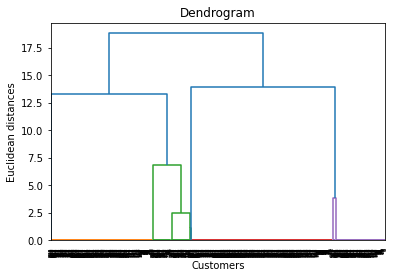

In [130]:
# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [132]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward').fit_predict(df)

In [133]:
# Export hc clusters
import pickle
obj = {'hc': hc}
output = open('1-bmw-cluster.pkl', 'wb')
pickle.dump(obj, output, 2)
output.close()